## Notebook: using jsonstat.py python library

This Jupyter notebook shows the python library [jsonstat.py](http://github.com/26fe/jsonstat.py) in action.
This example shows how to explore the jsonstat data file [oecd-canada](http://json-stat.org/samples/oecd-canada.json)

In [24]:
from __future__ import print_function
import os
import pandas as ps
import jsonstat

Download or use the jsonstat file cached on disk

In [25]:
url = 'http://json-stat.org/samples/oecd-canada.json'
file_name = "oecd-canada.json"

file_path = os.path.abspath(os.path.join("..", "tests", "fixtures", "collection", file_name))
if os.path.exists(file_path):
    print("using file from fixtures")
else:
    print("download file into the current directory")
    jsonstat.download(url, file_name)
    file_path = file_name

using file from fixtures


Initialize JsonStatCollection from the file and print some info.

In [26]:
collection = jsonstat.JsonStatCollection()
collection.from_file(file_path)
collection.info()

0: dataset 'oecd'
1: dataset 'canada'



In [27]:
oecd = collection.dataset('oecd')
print("*** dataset '{} info".format(oecd.name()))
oecd.info()

*** dataset 'oecd info
name:   'oecd'
label:  'Unemployment rate in the OECD countries 2003-2014'
source: 'Unemployment rate in the OECD countries 2003-2014'

dimensions:
dim id/name: 'concept' size: '1' role: 'metric'
dim id/name: 'area' size: '36' role: 'geo'
dim id/name: 'year' size: '12' role: 'time'



In [28]:
for d in oecd.dimensions():
    print("*** info for dimensions '{}'".format(d.name()))
    d.info()

*** info for dimensions 'concept'
index
  pos    idx  label
    0    UNR unemployment rate

*** info for dimensions 'year'
index
  pos    idx  label
    0   2003       
    1   2004       
    2   2005       
    3   2006       
    4   2007       
    5   2008       
    6   2009       
    7   2010       
    8   2011       
    9   2012       
   10   2013       
   11   2014       

*** info for dimensions 'area'
index
  pos    idx  label
    0     AU Australia
    1     AT Austria
    2     BE Belgium
    3     CA Canada
    4     CL  Chile
    5     CZ Czech Republic
    6     DK Denmark
    7     EE Estonia
    8     FI Finland
    9     FR France
   10     DE Germany
   11     GR Greece
   12     HU Hungary
   13     IS Iceland
   14     IE Ireland
   15     IL Israel
   16     IT  Italy
   17     JP  Japan
   18     KR  Korea
   19     LU Luxembourg
   20     MX Mexico
   21     NL Netherlands
   22     NZ New Zealand
   23     NO Norway
   24     PL Poland
   25     PT Portug

Value for oecd(area:IT,year:2012)

In [29]:
oecd.value(area='IT', year='2012')

8.264570818

In [30]:
df = oecd.to_data_frame('year', area='CA')
print(df)

             CA
2003   4.789363
2004   6.307841
2005   3.868296
2006   8.835277
2007   7.451741
2008  10.475967
2009   3.450432
2010   4.209946
2011  13.840391
2012   5.945157
2013   3.941659
2014   4.617465


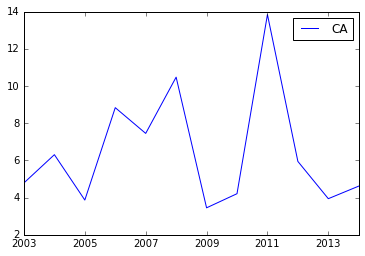

In [31]:
import matplotlib as plt
%matplotlib inline
df.plot()